<a href="https://colab.research.google.com/github/chemicoPy/covid-icu-system/blob/main/covid_icu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simpy

Patient number: 1 is registering for COVID testing at Day 0.0000
Patient number: 1 admitted to COVID testing at Day 0.0000
Patient number: 2 is registering for COVID testing at Day 0.8773
Patient number: 2 admitted to COVID testing at Day 0.8773
Patient number: 3 is registering for COVID testing at Day 1.1111
Patient number: 3 admitted to COVID testing at Day 1.1111
Patient number: 4 is registering for COVID testing at Day 1.1497
Patient number: 4 admitted to COVID testing at Day 1.1497
Patient number: 4 is registered for ICU bed at Day 1.9124
Patient number: 4 leaving COVID testing at Day 1.9124
Patient number: 4 admitted to the ICU unit at Day 1.9124
Patient number: 2 is registered for ICU bed at Day 2.1318
Patient number: 2 leaving COVID testing at Day 2.1318
Patient number: 2 admitted to the ICU unit at Day 2.1318
Patient number: 5 is registering for COVID testing at Day 2.5097
Patient number: 5 admitted to COVID testing at Day 2.5097
Patient number: 5 is registered for ICU bed at 

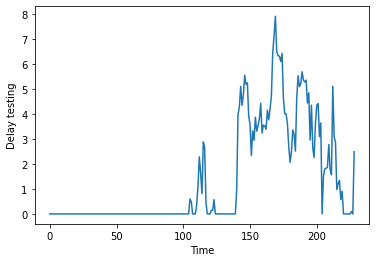

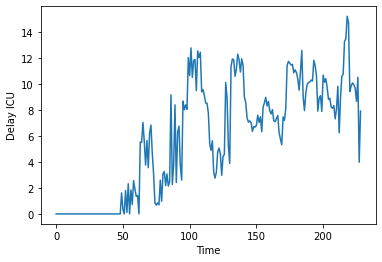

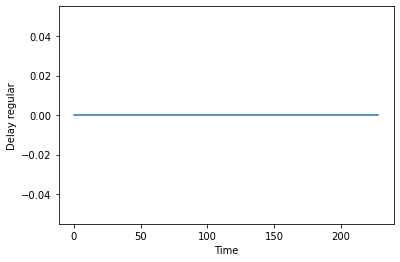

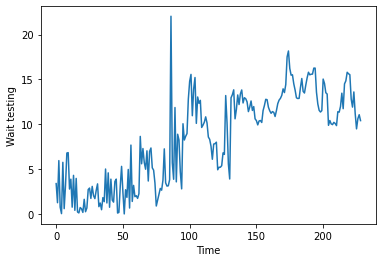

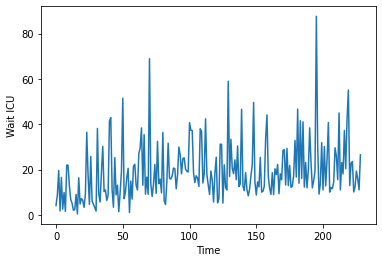

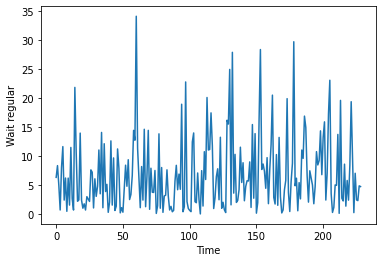

In [ ]:
"""
ICU COVID Example simulation model 
Patients with COVID arrive according to a Poisson process. Later versions will
include the posibility to read data from a .csv file. This also applies to the nominal 
length of stay for the different departments, 
which may differ over time.
"""

#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import simpy
from numpy.random import RandomState


#Inializa main variables
arrival_rate = 1.2
mean_los_test = 2
mean_los_icu = 14
mean_los_reg = 7

capacity_test = 12
capacity_icu = 15
capacity_reg = 20

rng_seed = 7009

patient_number_test_register_list = []
timestamp_test_register_list = []
patient_number_test_admission_list = []
timestamp_test_admission_list = []
patient_number_test_discharge_list = []
timestamp_test_discharge_list = []
patient_number_ICU_register_list = []
timestamp_ICU_register_list = []
patient_number_ICU_admission_list = []
timestamp_ICU_admission_list = []
patient_number_ICU_discharge_list = []
timestamp_ICU_discharge_list = []
patient_number_regular_register_list = []
timestamp_regular_register_list = []
patient_number_regular_admission_list = []
timestamp_regular_admission_list = []
patient_number_regular_discharge_list = []
timestamp_regular_discharge_list = []

df_test_register = pd.DataFrame(columns = ['Patient number', 'Timestamp test register'])
df_test_admission = pd.DataFrame(columns = ['Patient number', 'Timestamp test admission'])
df_test_discharge = pd.DataFrame(columns = ['Patient number', 'Timestamp test discharge'])
df_ICU_register = pd.DataFrame(columns = ['Patient number', 'Timestamp ICU register'])
df_ICU_admission = pd.DataFrame(columns = ['Patient number', 'Timestamp ICU admission'])
df_ICU_discharge = pd.DataFrame(columns = ['Patient number', 'Timestamp ICU discharge'])
df_regular_register = pd.DataFrame(columns = ['Patient number', 'Timestamp regular register'])
df_regular_admission = pd.DataFrame(columns = ['Patient number', 'Timestamp regular admission'])
df_regular_discharge = pd.DataFrame(columns = ['Patient number', 'Timestamp regular discharge'])

def generate_patient(env, arrival_stream, arrival_rate, inital_delay = 0,
                     stoptime = simpy.core.Infinity, prng = RandomState(0)):
    number_of_patients = 0
    yield env.timeout(inital_delay) #Yield the initial delay
    while (env.now <stoptime):
        inter_arrival_time = prng.exponential(1.0 / arrival_rate)
        los_test = prng.exponential(mean_los_test)
        los_icu = prng.exponential(mean_los_icu)
        los_reg = prng.exponential(mean_los_reg)
        
        number_of_patients += 1
        ppi = patient_stream(env, 'Patient number: {}'.format(number_of_patients),
                             los_test = los_test, los_icu = los_icu, los_reg = los_reg)
        env.process(ppi)
        yield env.timeout(inter_arrival_time)

def patient_stream(env, name_patient, los_test, los_icu, los_reg):
    #COVID testing
    print("{} is registering for COVID testing at Day {:.4f}".format(name_patient, env.now))
    patient_number_test_register_list.append(name_patient)
    timestamp_test_register_list.append(env.now)
    bed_request_timestamp = env.now
    bed_request1 = test_unit.request()
    yield bed_request1
    print("{} admitted to COVID testing at Day {:.4f}".format(name_patient, env.now))
    patient_number_test_admission_list.append(name_patient)
    timestamp_test_admission_list.append(env.now)
    
    if (env.now > bed_request_timestamp):
        print("{} has to wait {:.4f} days for COVID testing".format(name_patient, env.now - bed_request_timestamp))
    else:
        yield env.timeout(los_test)
    
    #ICU
    print("{} is registered for ICU bed at Day {:.4f}".format(name_patient, env.now))
    patient_number_ICU_register_list.append(name_patient)
    timestamp_ICU_register_list.append(env.now)
    bed_request_timestamp = env.now
    bed_request2 = icu_unit.request()
    yield bed_request2
    test_unit.release(bed_request1)
    print("{} leaving COVID testing at Day {:.4f}".format(name_patient, env.now))
    patient_number_test_discharge_list.append(name_patient)
    timestamp_test_discharge_list.append(env.now)
    print("{} admitted to the ICU unit at Day {:.4f}".format(name_patient, env.now))
    patient_number_ICU_admission_list.append(name_patient)
    timestamp_ICU_admission_list.append(env.now)
    if (env.now > bed_request_timestamp):
        print("{} has to wait {:.4f} days for a ICU bed".format(name_patient, env.now - bed_request_timestamp))
    yield env.timeout(los_icu)
    
    #Regular department
    print("{} is registered for a regular hospital bed at Day {:.4f}".format(name_patient, env.now))
    patient_number_regular_register_list.append(name_patient)
    timestamp_regular_register_list.append(env.now)
    bed_request_timestamp = env.now
    bed_request3 = reg_unit.request()
    yield bed_request3
    icu_unit.release(bed_request2)
    print("{} leaving the ICU unit at Day {:.4f}".format(name_patient, env.now))
    patient_number_ICU_discharge_list.append(name_patient)
    timestamp_ICU_discharge_list.append(env.now)
    print("{} admitted to the regular unit at Day {:.4f}".format(name_patient, env.now))
    patient_number_regular_admission_list.append(name_patient)
    timestamp_regular_admission_list.append(env.now)
    if (env.now > bed_request_timestamp):
        print("{} has to wait {:.4f} days for a regular hospital bed".format(name_patient, env.now - bed_request_timestamp))
    yield env.timeout(los_reg)
    reg_unit.release(bed_request3)
    print("{} leaving the regular department at Day {:.4f}".format(name_patient, env.now))
    patient_number_regular_discharge_list.append(name_patient)
    timestamp_regular_discharge_list.append(env.now)

#Set up the simulation environment
env = simpy.Environment()
prng = RandomState(rng_seed)
rho_test = arrival_rate * mean_los_test / capacity_test
rho_icu = arrival_rate * mean_los_icu / capacity_icu
rho_reg = arrival_rate * mean_los_reg / capacity_reg

test_unit = simpy.Resource(env, capacity_test)
icu_unit = simpy.Resource(env, capacity_icu)
reg_unit = simpy.Resource(env, capacity_reg)

runtime = 365
stop_arrivals = 200
env.process(generate_patient(env, "Type1", arrival_rate, 0, stop_arrivals, prng))
env.run(until = runtime)

#Construct the dataframes
df_test_register['Patient number'] = patient_number_test_register_list
df_test_register['Timestamp test register'] = timestamp_test_register_list
df_test_admission['Patient number'] = patient_number_test_admission_list
df_test_admission['Timestamp test admission'] = timestamp_test_admission_list
df_test_discharge['Patient number'] = patient_number_test_discharge_list
df_test_discharge['Timestamp test discharge'] = timestamp_test_discharge_list
df_ICU_register['Patient number'] = patient_number_ICU_register_list
df_ICU_register['Timestamp ICU register'] = timestamp_ICU_register_list
df_ICU_admission['Patient number'] = patient_number_ICU_admission_list
df_ICU_admission['Timestamp ICU admission'] = timestamp_ICU_admission_list
df_ICU_discharge['Patient number'] = patient_number_ICU_discharge_list
df_ICU_discharge['Timestamp ICU discharge'] = timestamp_ICU_discharge_list
df_regular_register['Patient number'] = patient_number_regular_register_list
df_regular_register['Timestamp regular register'] = timestamp_regular_register_list
df_regular_admission['Patient number'] = patient_number_regular_admission_list
df_regular_admission['Timestamp regular admission'] = timestamp_regular_admission_list
df_regular_discharge['Patient number'] = patient_number_regular_discharge_list
df_regular_discharge['Timestamp regular discharge'] = timestamp_regular_discharge_list    

#Merge the dateframe by patient number
df_total = pd.merge(df_test_register, df_test_admission, on='Patient number', how='left')
df_total = pd.merge(df_total, df_test_discharge, on = 'Patient number', how = 'left')
df_total = pd.merge(df_total, df_ICU_register, on = 'Patient number', how = 'left')
df_total = pd.merge(df_total, df_ICU_admission, on = 'Patient number', how = 'left')
df_total = pd.merge(df_total, df_ICU_discharge, on = 'Patient number', how  = 'left')
df_total = pd.merge(df_total, df_regular_register, on = 'Patient number', how = 'left')
df_total = pd.merge(df_total, df_regular_admission, on = 'Patient number', how = 'left')
df_total = pd.merge(df_total, df_regular_discharge, on = 'Patient number', how = 'left')

#Calculate delay
delay_test = [0] * len(df_total)
delay_ICU = [0] * len(df_total)
delay_regular = [0] * len(df_total)

for i in range(len(df_total)):
    if (df_total['Timestamp test admission'][i] > df_total['Timestamp test register'][i]):
        delay_test[i] = df_total['Timestamp test admission'][i] - df_total['Timestamp test register'][i]
    
    if (df_total['Timestamp ICU admission'][i] > df_total['Timestamp ICU register'][i]):
        delay_ICU[i] = df_total['Timestamp ICU admission'][i] - df_total['Timestamp ICU register'][i]
        
    if (df_total['Timestamp regular admission'][i] > df_total['Timestamp regular admission'][i]):
        delay_regular[i] = df_total['Timestamp regular admission'][i] - df_total['Timestamp regular register'][i]

df_total['Delay test'] = delay_test
df_total['Delay ICU'] = delay_ICU
df_total['Delay regular'] = delay_regular

df_total['LoS test'] = df_total['Timestamp test discharge'] - df_total['Timestamp test admission']
df_total['LoS ICU'] = df_total['Timestamp ICU discharge'] - df_total['Timestamp ICU admission']
df_total['LoS regular'] = df_total['Timestamp regular discharge'] - df_total['Timestamp regular admission']

df_total['Wait test'] = df_total['Delay test'] + df_total['LoS test']
df_total['Wait ICU'] = df_total['Delay ICU'] + df_total['LoS ICU']
df_total['Wait regular'] = df_total['Delay regular'] + df_total['LoS regular']

#Statistics
n = len(df_total)
interarrival_test_list = [0]
interarrival_ICU_list = [0]
interarrival_regular_list = [0]

for i in range(1,len(df_total)):
    interarrival_test_list.append(df_total['Timestamp test register'][i] - df_total['Timestamp test register'][i-1])
    interarrival_ICU_list.append(df_total['Timestamp ICU register'][i] - df_total['Timestamp ICU register'][i-1]) 
    interarrival_regular_list.append(df_total['Timestamp regular register'][i] - df_total['Timestamp regular register'][i-1])

df_total['Interarrival test'] = interarrival_test_list
df_total['Interarrival ICU'] = interarrival_ICU_list
df_total['Interarrival regular'] = interarrival_regular_list

r_mean_test = df_total['Interarrival test'].mean()
r_mean_ICU = df_total['Interarrival ICU'].mean()
r_mean_regular = df_total['Interarrival regular'].mean()

s_mean_test = df_total['LoS test'].mean()
s_mean_ICU = df_total['LoS ICU'].mean()
s_mean_regular = df_total['LoS regular'].mean()

r_rate_test = 1 / r_mean_test
r_rate_ICU = 1 / r_mean_ICU
r_rate_regular = 1/ r_mean_regular

s_rate_test = 1/ s_mean_test
s_rate_ICU = 1 / s_mean_ICU
s_rate_regular = 1 / s_mean_regular

d_mean_test = df_total['Delay test'].mean()
d_mean_ICU = df_total['Delay ICU'].mean()
d_mean_regular = df_total['Delay regular'].mean()

w_mean_test = df_total['Wait test'].mean()
w_mean_ICU = df_total['Wait ICU'].mean()
w_mean_regular = df_total['Wait regular'].mean()

l_mean_test = (n / df_total['Timestamp test discharge'][n-1]) * w_mean_test
l_mean_ICU = (n / df_total['Timestamp ICU discharge'][n-1]) * w_mean_ICU
l_mean_regular = (n / df_total['Timestamp regular discharge'][n-1]) * w_mean_regular

q_mean_test = (n / df_total['Timestamp test discharge'][n-1]) * d_mean_test
q_mean_ICU = (n / df_total['Timestamp ICU discharge'][n-1]) * d_mean_ICU
q_mean_regular = (n / df_total['Timestamp regular discharge'][n-1]) * d_mean_regular

x_mean_test = (n / df_total['Timestamp test discharge'][n-1]) * s_mean_test
x_mean_ICU = (n / df_total['Timestamp ICU discharge'][n-1]) * s_mean_ICU
x_mean_regular = (n / df_total['Timestamp regular discharge'][n-1]) * s_mean_regular

c_a_ratio_test = (df_total['Timestamp test discharge'][n-1] / df_total['Timestamp test register'][n-1]) * x_mean_test
c_a_ratio_ICU = (df_total['Timestamp ICU discharge'][n-1] / df_total['Timestamp ICU register'][n-1]) * x_mean_ICU
c_a_ratio_regular = (df_total['Timestamp regular discharge'][n-1] / df_total['Timestamp regular register'][n-1]) * x_mean_regular


#Print the statistics
print("")
print("*** PATIENT AVERAGED STATISTICS ***")
print("")
print("*** COVID TESTING ***")
print("The average inter-arrival time of patients at COVID testing is " + str(r_mean_test) + " days")
print("The average service time for COVID testing per patient is " + str(s_mean_test) + " days.")
print("The average arrival rate for patients at COVID testing is " + str(r_rate_test) + " days.")
print("The average service rate for COVID testing is " + str(s_rate_test) + " days.")
print("The average delay of patients at COVID testing is " + str(d_mean_test) + " days.")
print("The average waiting time of patients at COVID testing is " + str(w_mean_test) + " days.")
print("")
print("*** ICU UNIT ***")
print("The average inter-arrival time of patients at ICU is " + str(r_mean_ICU) + " days")
print("The average service time for the ICU unit per patient is " + str(s_mean_ICU) + " days.")
print("The average arrival rate for patients at ICU is " + str(r_rate_ICU) + " days.")
print("The average service rate for the ICU unit is " + str(s_rate_ICU) + " days.")
print("The average delay of patients at the ICU unit is " + str(d_mean_ICU) + " days.")
print("The average waiting time of patients at the ICU unit is " + str(w_mean_ICU) + " days.")
print("")
print("*** REGULAR HOSPITAL UNIT ***")
print("The average inter-arrival time of patients at regular hospital unit is " + str(r_mean_regular) + " days")
print("The average service time for the regular hospital unit per patient is " + str(s_mean_regular) + " days.")
print("The average arrival rate for patients at the regular hospital unit is " + str(r_rate_regular) + " days.")
print("The average service rate of the regular hospital unit is " + str(s_rate_regular) + " days.")
print("The average delay of patients at the regular hospital unit is " + str(d_mean_regular) + " days.")
print("The average waiting time of patients at the regular hospital unit is " + str(w_mean_regular) + " days.")
print("")
print("*** TIME AVERAGED STATISTICS ***")
print("")
print("*** COVID TESTING ***")
print("The time averaged patients in the node COVID testing is " + str(l_mean_test))
print("The time averaged number of patients in the queue for COVID testing is " + str(q_mean_test))
print("The time averaged number of patiens in service for COVID testing is " + str(x_mean_test))
print("The time averaged traffic intensity for COVID testing is " + str(c_a_ratio_test))
print("")
print("*** ICU UNIT ***")
print("The time averaged patients in the node ICU unit is " + str(l_mean_ICU))
print("The time averaged number of patients in the queue for the ICU unit is " + str(q_mean_ICU))
print("The time averaged number of patients in service in the ICU unit is " + str(x_mean_ICU))
print("The time averaged traffic intensity for the ICU unit is " + str(c_a_ratio_ICU))
print("")
print("*** REGULAR HOSPITAL UNIT ***")
print("The time averaged patients in the node regular hospital unit is " + str(l_mean_regular))
print("The time averaged number of patients in the queue for the regular hospital unit is " + str(q_mean_regular))
print("The time averaged numer of patients in service at the regular hospital unit is " + str(x_mean_regular))
print("The time averaged traffic intensity for the regular hospital unit is " + str(c_a_ratio_regular))

#Create some plots
plt.plot(df_total['Delay test'])
plt.xlabel("Time")
plt.ylabel('Delay testing')
plt.show()

plt.plot(df_total['Delay ICU'])
plt.xlabel("Time")
plt.ylabel('Delay ICU')
plt.show()

plt.plot(df_total['Delay regular'])
plt.xlabel("Time")
plt.ylabel('Delay regular')
plt.show()

plt.plot(df_total['Wait test'])
plt.xlabel("Time")
plt.ylabel('Wait testing')
plt.show()

plt.plot(df_total['Wait ICU'])
plt.xlabel("Time")
plt.ylabel('Wait ICU')
plt.show()

plt.plot(df_total['Wait regular'])
plt.xlabel("Time")
plt.ylabel('Wait regular')
plt.show()